# Project Name - MediBuddy Insurance EDA Project

Project Type - Exploratory Data Analysis (EDA)  
Contribution - Individual  

Team Member - Gangarapu Datha Naga Sai

Project Summary -
Write the summary here within 500-600 words.
## Project Summary

This project focuses on performing Exploratory Data Analysis (EDA) on MediBuddy insurance data to understand customer behavior and factors influencing insurance claim amounts. The dataset consists of two separate files containing personal customer information and insurance pricing details. These datasets were merged using Policy Number as a common identifier to create a unified dataset for analysis.

The merged dataset contains 1338 customer records with attributes such as age, gender, BMI, smoking status, region, number of dependents, and insurance charges. Initial data exploration showed that the dataset had no missing values and did not contain duplicate records, indicating good data quality. Column names were standardized to improve readability and coding efficiency. Additionally, a new feature called BMI Category was created to classify customers into health groups such as Underweight, Normal, Overweight, and Obese.

Several visualizations were created to understand the patterns in the data. Age distribution analysis revealed that most MediBuddy customers belong to the working-age group, indicating that insurance services are primarily used by economically active individuals. BMI distribution showed that a large portion of customers fall into the overweight category, highlighting potential health risks within the customer base.

Insurance charge distribution analysis showed a right-skewed pattern, meaning that most customers have low to medium insurance claims, while a small percentage of customers generate very high claim amounts. Gender-based analysis indicated slight differences in insurance charges between male and female customers, though the variation was not extremely significant.

Smoking status analysis revealed a strong impact on insurance costs. Smokers were found to have significantly higher average insurance charges compared to non-smokers, making smoking one of the most critical risk factors affecting insurance pricing. Regional analysis showed variations in insurance charges across different locations, with certain regions having higher average claim amounts. This indicates that geographical factors also influence healthcare costs.

The relationship between number of dependents and insurance charges showed that customers with moderate family sizes tend to have higher insurance expenses. BMI category analysis further confirmed that obese and overweight customers incur higher insurance costs compared to customers with normal BMI levels.

Overall, this EDA project provides valuable insights into customer health patterns, risk factors, and cost drivers. These insights can help MediBuddy optimize premium pricing, design targeted insurance plans, improve risk management strategies, and promote healthier lifestyle programs. The analysis supports data-driven decision making and helps the organization better understand its customer base.


## GitHub Repository Link

GitHub Repository: https://github.com/nagasai-datha/MediBuddy-Insurance-EDA


## Problem Statement

MediBuddy operates in the healthcare insurance domain and manages a large volume of customer insurance data. Understanding customer behavior, risk factors, and premium pricing patterns is essential for optimizing insurance policies and improving profitability.

The objective of this project is to perform Exploratory Data Analysis (EDA) on MediBuddy insurance data to identify important factors affecting insurance charges and customer segmentation. This analysis helps the company make informed business and pricing decisions based on data insights.


## Business Objective

• Identify key factors influencing insurance premium charges  
• Analyze customer health and demographic patterns  
• Detect high-risk customer groups such as smokers and obese customers  
• Support data-driven insurance pricing decisions  
• Improve customer segmentation and business strategy  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')


In [2]:
df_personal = pd.read_excel("Medibuddy insurance data personal details (1) (2).xlsx")

df_price = pd.read_excel("Medibuddy Insurance Data Price (1) (2).xlsx")


In [3]:
df_personal.head()


,Policy no.,children,smoker,region
0,PLC157006,0,no,southwest
1,PLC157033,1,no,southwest
2,PLC157060,0,no,southwest
3,PLC157087,1,no,southwest
4,PLC157186,5,no,southwest


In [4]:
df_price.head()


,Policy no.,age,sex,bmi,charges in INR
0,PLC156898,19,female,27.900,16884.92400
1,PLC156907,18,male,33.770,1725.55230
2,PLC156916,28,male,33.000,4449.46200
3,PLC156925,33,male,22.705,21984.47061
4,PLC156934,32,male,28.880,3866.85520


In [5]:
print("Personal Dataset Shape:", df_personal.shape)
print("Price Dataset Shape:", df_price.shape)


Personal Dataset Shape: (1338, 4)
Price Dataset Shape: (1338, 5)


In [6]:
print("Personal Dataset Columns:")
print(df_personal.columns)

print("\nPrice Dataset Columns:")
print(df_price.columns)


Personal Dataset Columns:
Index(['Policy no.', 'children', 'smoker', 'region'], dtype='object')

Price Dataset Columns:
Index(['Policy no.', 'age', 'sex', 'bmi', 'charges in INR'], dtype='object')


In [7]:
df_personal.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Policy no.  1338 non-null   object
 1   children    1338 non-null   int64 
 2   smoker      1338 non-null   object
 3   region      1338 non-null   object
dtypes: int64(1), object(3)
memory usage: 41.9+ KB


In [8]:
df_price.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Policy no.      1338 non-null   object 
 1   age             1338 non-null   int64  
 2   sex             1338 non-null   object 
 3   bmi             1338 non-null   float64
 4   charges in INR  1338 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 52.4+ KB


In [9]:
df_personal.describe()


,children
count,1338.000000
mean,1.094918
std,1.205493
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,5.000000


In [10]:
df_price.describe()

,age,bmi,charges in INR
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [11]:
df_personal.isnull().sum()


Policy no.    0
children      0
smoker        0
region        0
dtype: int64

In [12]:
df_price.isnull().sum()

Policy no.        0
age               0
sex               0
bmi               0
charges in INR    0
dtype: int64

## Dataset Understanding

The MediBuddy dataset contains customer personal and insurance related information such as age, gender, BMI, smoking status, region, dependents, and insurance charges.

There are 1338 records in the dataset and no missing values were found. The dataset is clean and suitable for further analysis.

The dataset consists of two separate files which were later merged using Policy Number as the common key to create a single master dataset.


## Variables Description

• policy_no — Unique insurance policy identifier  
• age — Age of the customer  
• sex — Gender of the customer  
• bmi — Body Mass Index  
• bmi_category — Health category derived from BMI values  
• smoker — Smoking status (yes/no)  
• children — Number of dependents  
• region — Customer residential region  
• charges_in_inr — Insurance premium amount in INR  


In [13]:
df = pd.merge(df_personal, df_price, on='Policy no.', how='inner')


In [14]:
df.head()


,Policy no.,children,smoker,region,age,sex,bmi,charges in INR
0,PLC157006,0,no,southwest,23,male,34.4,1826.843
1,PLC157033,1,no,southwest,19,male,24.6,1837.237
2,PLC157060,0,no,southwest,56,male,40.3,10602.385
3,PLC157087,1,no,southwest,30,female,32.4,4149.736
4,PLC157186,5,no,southwest,19,female,28.6,4687.797


In [15]:
df.shape


(1338, 8)

In [16]:
df.duplicated().sum()


np.int64(0)

In [17]:
df.columns = df.columns.str.lower().str.replace(" ", "_").str.replace(".", "")

In [18]:
df.columns

Index(['policy_no', 'children', 'smoker', 'region', 'age', 'sex', 'bmi',
       'charges_in_inr'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   policy_no       1338 non-null   object 
 1   children        1338 non-null   int64  
 2   smoker          1338 non-null   object 
 3   region          1338 non-null   object 
 4   age             1338 non-null   int64  
 5   sex             1338 non-null   object 
 6   bmi             1338 non-null   float64
 7   charges_in_inr  1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


In [20]:
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"

df['bmi_category'] = df['bmi'].apply(bmi_category)


In [21]:
df[['bmi', 'bmi_category']].tail()


,bmi,bmi_category
1333,29.925,Overweight
1334,21.660,Normal
1335,24.605,Normal
1336,21.850,Normal
1337,26.695,Overweight


## Data Wrangling and Preprocessing

The following preprocessing steps were performed:

• Merged personal and insurance datasets using inner join.  
• Checked and confirmed no duplicate records.  
• Standardized column names for easy analysis.  
• Created BMI Category feature to classify customers into health groups.

These steps helped prepare the dataset for accurate exploratory data analysis.


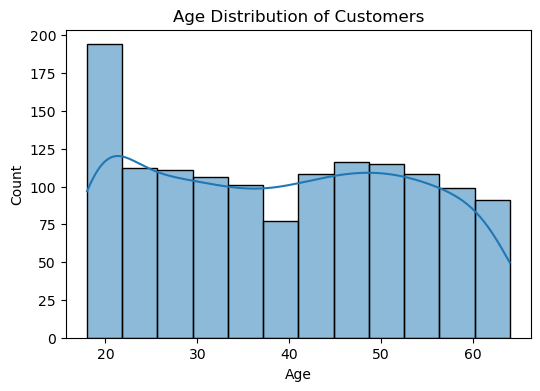

In [22]:
## Chart 1: Age Distribution chart
plt.figure(figsize=(6,4))
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

## chart 1 : Age Distribution Analysis

### 1. Why did you pick this chart?

This histogram chart is used to understand the distribution of customers across different age groups. It helps in identifying which age category forms the majority of MediBuddy's customer base.

---

### 2. What insights are found from this chart?

• The majority of customers belong to the young and middle-age group (approximately 18 to 55 years).  
• There are fewer customers in the senior age category (above 60 years).  
• The distribution shows that MediBuddy primarily serves working-age individuals.  

---

### 3. Business Impact of these insights

• Since most customers fall in the working-age group, MediBuddy can design customized insurance plans targeting this segment.  
• Fewer senior customers indicate an opportunity to design special senior citizen insurance policies.  
• Understanding age distribution helps in better risk assessment and premium pricing strategies.


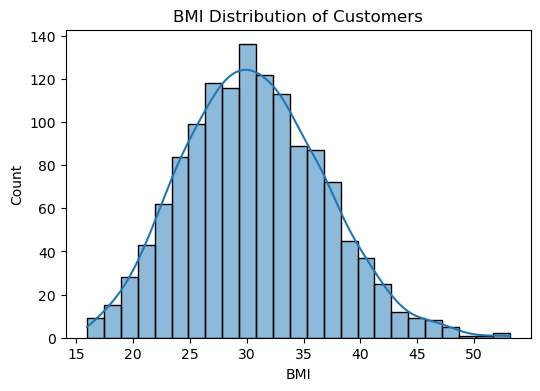

In [23]:
## chart 2 : BMI Distribution Chart
plt.figure(figsize=(6,4))
sns.histplot(df['bmi'], kde=True)
plt.title("BMI Distribution of Customers")
plt.xlabel("BMI")
plt.ylabel("Count")
plt.show()


## Chart 2: BMI Distribution Analysis

### 1. Why did you pick this chart?

This histogram chart is used to understand the distribution of customers based on BMI values. It helps identify the overall health condition pattern of MediBuddy customers.

---

### 2. What insights are found from this chart?

• Most customers have BMI values between 25 and 35, which falls under overweight category.  
• There are very few underweight customers.  
• A small portion of customers belong to obese category with very high BMI values.  

---

### 3. Business Impact of these insights

• Customers with higher BMI values generally have higher health risks, which may lead to higher insurance claims.  
• MediBuddy can adjust premium pricing based on BMI categories.  
• Healthy BMI customers can be rewarded with discounts and wellness benefits.


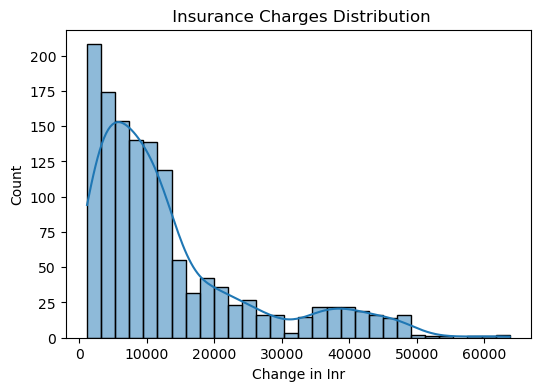

In [24]:
## chart 3 : Insurance Charges Distribution
plt.figure(figsize=(6,4))
sns.histplot(df['charges_in_inr'], kde=True)
plt.title(" Insurance Charges Distribution")
plt.xlabel("Change in Inr")
plt.ylabel("Count")
plt.show()

## Chart 3: Insurance Charges Distribution Analysis

### 1. Why did you pick this chart?

This histogram chart is used to understand how insurance claim amounts are distributed among MediBuddy customers. It helps identify low-cost and high-cost customers.

---

### 2. What insights are found from this chart?

• Most customers have insurance charges in the lower to medium range.  
• A small percentage of customers have very high insurance claim amounts.  
• The distribution is right-skewed, indicating presence of high-risk customers.

---

### 3. Business Impact of these insights

• High claim customers can cause financial risk to the company.  
• MediBuddy can design special premium plans for high-risk customers.  
• Understanding spending distribution helps improve pricing strategies and reduce losses.


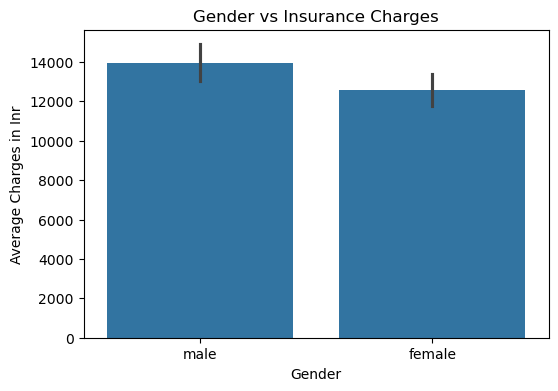

In [25]:
## Chart 4 : Gender vs Insurance Charges (Bar Chart)
plt.figure(figsize=(6,4))
sns.barplot(x='sex' , y='charges_in_inr', data = df)
plt.title("Gender vs Insurance Charges")
plt.xlabel("Gender")
plt.ylabel("Average Charges in Inr")
plt.show()

## Chart 4: Gender vs Insurance Charges Analysis

### 1. Why did you pick this chart?

This bar chart is used to compare the average insurance claim amount between male and female customers. It helps understand whether gender impacts insurance cost.

---

### 2. What insights are found from this chart?

• Male customers have slightly higher average insurance charges compared to female customers.  
• The difference is present but not extremely large.  

---

### 3. Business Impact of these insights

• Gender can be considered as a supporting factor in insurance risk analysis.  
• MediBuddy should avoid direct discrimination but can combine gender with other factors like age, BMI, and smoking habits.  
• This insight helps in designing fair and balanced insurance policies.


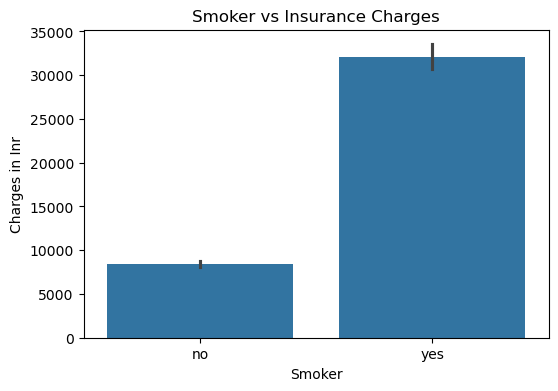

In [26]:
## Chart 5 : Smoker vs Insurance Charges
plt.figure(figsize=(6,4))
sns.barplot(x = 'smoker' , y = 'charges_in_inr' , data = df)
plt.title("Smoker vs Insurance Charges")
plt.xlabel("Smoker")
plt.ylabel("Charges in Inr")
plt.show()

## Chart 5: Smoker vs Insurance Charges Analysis

### 1. Why did you pick this chart?

This bar chart is used to compare the insurance claim amounts between smokers and non-smokers. Smoking is an important health risk factor that can directly affect insurance costs.

---

### 2. What insights are found from this chart?

• Smokers have significantly higher average insurance charges compared to non-smokers.  
• The difference between smoker and non-smoker claim amounts is very large.  
• Smoking status is one of the strongest factors affecting insurance cost.

---

### 3. Business Impact of these insights

• MediBuddy should charge higher premiums for smokers to reduce financial risk.  
• Smoking status should be a key parameter in policy pricing decisions.  
• Wellness programs can be introduced to encourage healthier lifestyles among customers.


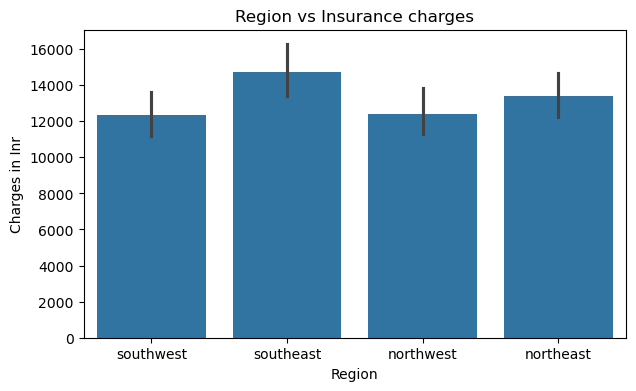

In [27]:
## Chart 6 : Region vs Insurance Charges
plt.figure(figsize=(7,4))
sns.barplot(x = 'region' , y = 'charges_in_inr' , data = df)
plt.title("Region vs Insurance charges")
plt.xlabel("Region")
plt.ylabel("Charges in Inr")
plt.show()

## Chart 6: Region vs Insurance Charges Analysis

### 1. Why did you pick this chart?

This bar chart is used to compare insurance claim amounts across different geographic regions. It helps identify location-based cost differences.

---

### 2. What insights are found from this chart?

• Southeast region shows the highest average insurance charges.  
• Southwest and Northwest regions have comparatively lower insurance costs.  
• Insurance charges vary across regions, indicating geographical influence on healthcare expenses.

---

### 3. Business Impact of these insights

• MediBuddy can introduce region-based premium pricing strategies.  
• Region-specific health plans can be designed to improve profitability.  
• Location-based risk assessment can help optimize insurance offerings.


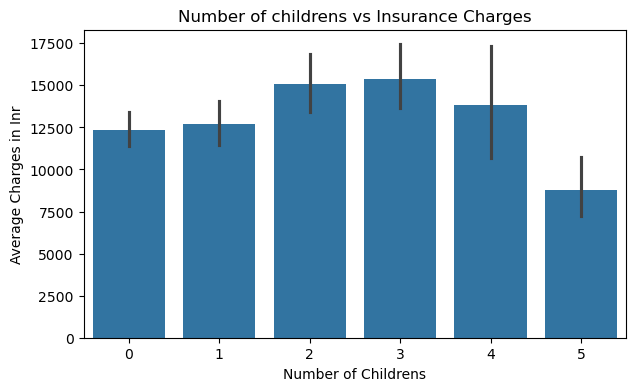

In [28]:
## Chart 7 : Children (Dependents) vs Insurance Charges
plt.figure(figsize=(7,4))
sns.barplot(x = 'children' , y = 'charges_in_inr' , data = df)
plt.title("Number of childrens vs Insurance Charges")
plt.xlabel("Number of Childrens")
plt.ylabel("Average Charges in Inr")
plt.show()

## Chart 7: Number of Children vs Insurance Charges Analysis

### 1. Why did you pick this chart?

This bar chart is used to analyze how the number of dependents (children) affects insurance claim amounts. Family size can influence healthcare expenses.

---

### 2. What insights are found from this chart?

• Customers with 2 to 3 children show relatively higher average insurance charges.  
• Customers with fewer dependents have moderate insurance costs.  
• Insurance charges do not increase linearly with number of children.

---

### 3. Business Impact of these insights

• MediBuddy can design family insurance plans based on number of dependents.  
• Premium pricing can consider dependent count as a supporting factor.  
• Family-based policies can improve customer retention.


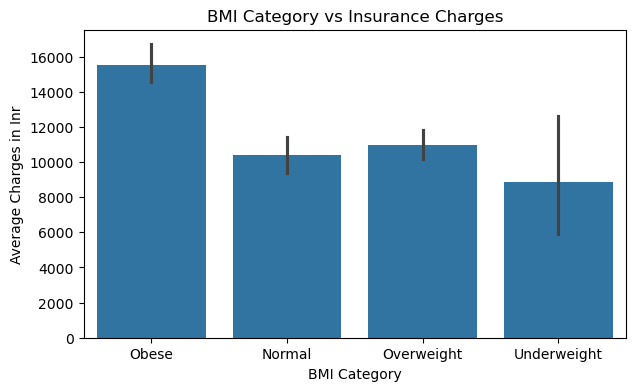

In [29]:
## Chart 8 : BMI Category vs Insurance Charges
plt.figure(figsize=(7,4))
sns.barplot(x = 'bmi_category', y = 'charges_in_inr' , data = df)
plt.title("BMI Category vs Insurance Charges")
plt.xlabel("BMI Category")
plt.ylabel("Average Charges in Inr")
plt.show()

## Chart 8: BMI Category vs Insurance Charges Analysis

### 1. Why did you pick this chart?

This bar chart is used to analyze how different BMI health categories affect insurance claim amounts. BMI is an important health indicator.

---

### 2. What insights are found from this chart?

• Obese customers have the highest average insurance charges.  
• Overweight customers also show higher claim amounts compared to normal BMI customers.  
• Normal and underweight customers have relatively lower insurance costs.

---

### 3. Business Impact of these insights

• MediBuddy can offer discounts to customers with healthy BMI levels.  
• Higher premium pricing can be applied to high-risk BMI categories.  
• BMI-based health programs can help reduce long-term insurance costs.


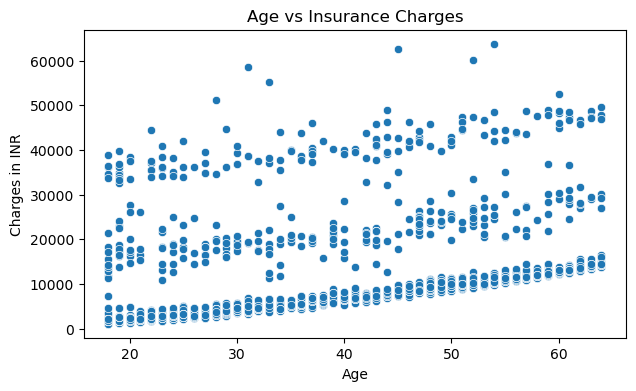

In [30]:
## Chart 9 : Age vs Insurance Charges (Scatter Plot)
plt.figure(figsize=(7,4))
sns.scatterplot(x='age', y='charges_in_inr', data=df)
plt.xlabel("Age")
plt.ylabel("Charges in INR")
plt.title("Age vs Insurance Charges")
plt.show()

## Chart 9: Age vs Insurance Charges Analysis

### 1. Why did you pick this chart?

This scatter plot is used to analyze the relationship between customer age and insurance claim amount. It helps understand how age influences healthcare costs.

---

### 2. What insights are found from this chart?

• Insurance charges generally increase as age increases.  
• Older customers tend to have higher claim amounts.  
• Younger customers mostly fall into the low insurance cost range.  
• Few extreme high-cost outliers are present across age groups.

---

### 3. Business Impact of these insights

• Age-based premium pricing can improve risk management.  
• Senior customers may require specialized insurance plans.  
• Preventive healthcare programs can be targeted for aging customers.


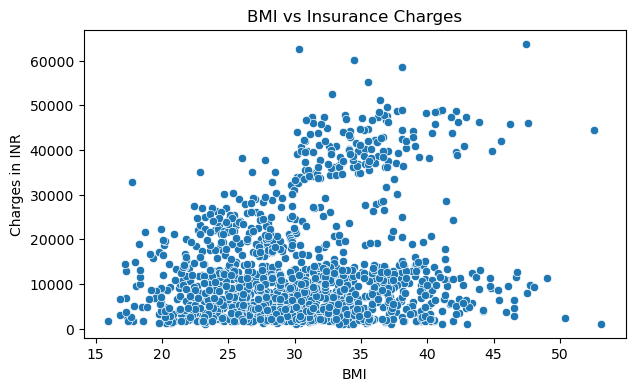

In [31]:
## Chart 10 : BMI vs Insurance Charges (Scatter Plot)
plt.figure(figsize=(7,4))
sns.scatterplot(x = 'bmi', y = 'charges_in_inr' , data = df)
plt.title("BMI vs Insurance Charges")
plt.xlabel("BMI")
plt.ylabel("Charges in INR")
plt.show()

## Chart 10: BMI vs Insurance Charges Analysis

### 1. Why did you pick this chart?

This scatter plot is used to study the relationship between customer BMI and insurance claim amounts. BMI is an important health indicator that affects medical risk.

---

### 2. What insights are found from this chart?

• Insurance charges increase as BMI increases.  
• Customers with higher BMI show significantly higher claim amounts.  
• Lower BMI customers generally fall into lower insurance cost ranges.  
• BMI has a positive correlation with healthcare expenses.

---

### 3. Business Impact of these insights

• BMI-based premium adjustment can improve pricing accuracy.  
• Health improvement programs can help reduce long-term claim costs.  
• Risk-based segmentation can improve insurance profitability.


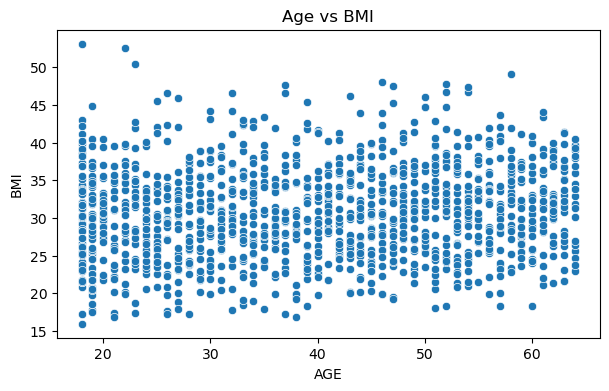

In [32]:
## Chart 11 : Age vs BMI (Scatter Plot)
plt.figure(figsize=(7,4))
sns.scatterplot(x = 'age' , y = 'bmi' , data = df)
plt.title("Age vs BMI")
plt.xlabel("AGE")
plt.ylabel("BMI")
plt.show()

## Chart 11: Age vs BMI Analysis

### 1. Why did you pick this chart?

This scatter plot is used to analyze the relationship between customer age and BMI. It helps understand whether BMI changes significantly with age.

---

### 2. What insights are found from this chart?

• BMI values are distributed across all age groups.  
• There is no strong direct correlation between age and BMI.  
• Both young and older customers can fall into overweight and obese categories.  
• Lifestyle factors may have more impact on BMI than age alone.

---

### 3. Business Impact of these insights

• Health awareness programs should target all age groups.  
• BMI-based risk assessment should not depend only on age.  
• Preventive wellness programs can be offered across customer segments.


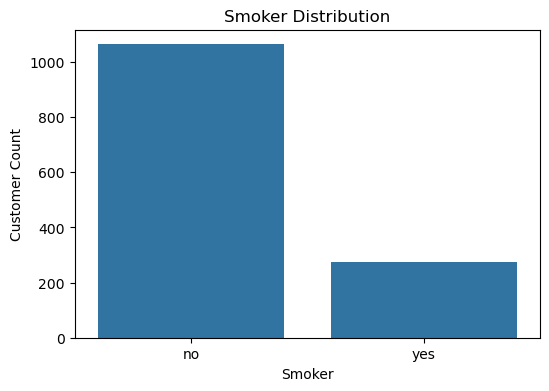

In [33]:
## Chart 12 : Smoker Count Distribution (Count Plot)
plt.figure(figsize=(6,4))
sns.countplot(x = 'smoker' , data = df)
plt.title("Smoker Distribution")
plt.xlabel("Smoker")
plt.ylabel("Customer Count")
plt.show()

## Chart 12: Smoker Distribution Analysis

### 1. Why did you pick this chart?

This count plot is used to understand the proportion of smokers and non-smokers in the customer dataset. It helps identify high-risk customer groups.

---

### 2. What insights are found from this chart?

• Most customers are non-smokers.  
• Smokers form a smaller percentage of the customer base.  
• Despite smaller numbers, smokers contribute higher insurance claims.

---

### 3. Business Impact of these insights

• Smoking prevention programs can reduce future claim costs.  
• Higher premiums can be applied to smoker customers.  
• Awareness campaigns can be targeted to high-risk groups.


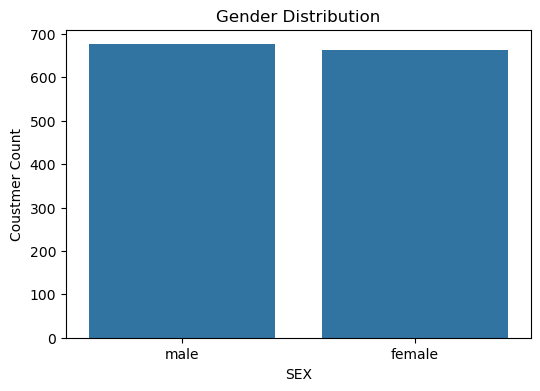

In [34]:
## Chart 13 : Gender Distribution (Count Plot)
plt.figure(figsize=(6,4))
sns.countplot(x = 'sex', data = df)
plt.title("Gender Distribution")
plt.xlabel("SEX")
plt.ylabel("Coustmer Count")
plt.show()

## Chart 13: Gender Distribution Analysis

### 1. Why did you pick this chart?

This count plot is used to understand the gender composition of MediBuddy customers. It helps identify customer demographics.

---

### 2. What insights are found from this chart?

• The number of male and female customers is almost balanced.  
• There is no major gender dominance in the customer base.  
• Both genders actively use MediBuddy insurance services.

---

### 3. Business Impact of these insights

• Gender-neutral marketing strategies can be applied.  
• Insurance products can be designed equally for both genders.  
• Balanced customer base improves service reach.


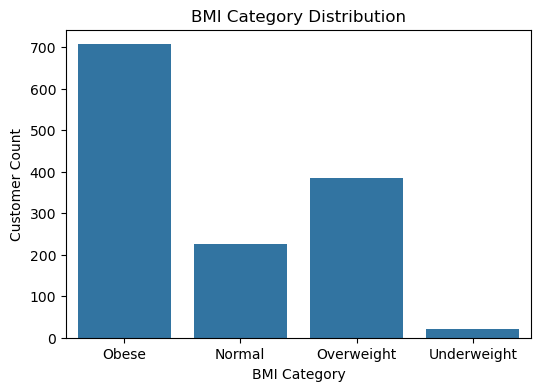

In [35]:
## Chart 14 : BMI Category Distribution (Count Plot)
plt.figure(figsize=(6,4))
sns.countplot(x = 'bmi_category' , data = df)
plt.title("BMI Category Distribution")
plt.xlabel("BMI Category")
plt.ylabel("Customer Count")
plt.show()

## Chart 14: BMI Category Distribution Analysis

### 1. Why did you pick this chart?

This count plot is used to understand the distribution of customers across different BMI health categories. It helps identify overall health trends in the customer base.

---

### 2. What insights are found from this chart?

• Most customers fall under the obese category.  
• Overweight customers also form a significant portion.  
• Normal BMI customers are fewer compared to high-risk categories.  
• Underweight customers are very limited.

---

### 3. Business Impact of these insights

• Health improvement programs can be promoted to reduce risk.  
• Preventive care initiatives can lower future insurance costs.  
• High BMI customers may require special premium pricing strategies.


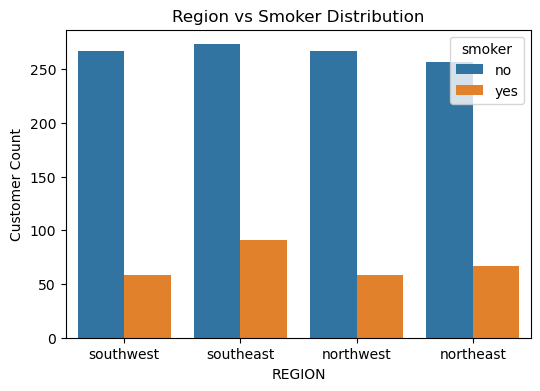

In [36]:
## Chart 15 : Region vs Smoker (Count Plot)
plt.figure(figsize=(6,4))
sns.countplot(x = 'region' , hue = 'smoker' , data = df)
plt.title("Region vs Smoker Distribution")
plt.xlabel("REGION")
plt.ylabel("Customer Count")
plt.show()

## Chart 15: Region vs Smoker Distribution Analysis

### 1. Why did you pick this chart?

This count plot is used to analyze smoking behavior across different regions. It helps identify geographical smoking patterns.

---

### 2. What insights are found from this chart?

• Southeast region has comparatively more smokers.  
• All regions have more non-smokers than smokers.  
• Smoking behavior varies across locations.

---

### 3. Business Impact of these insights

• Region-specific health awareness campaigns can be introduced.  
• High-smoking regions can be targeted with preventive programs.  
• Location-based risk management can improve insurance planning.


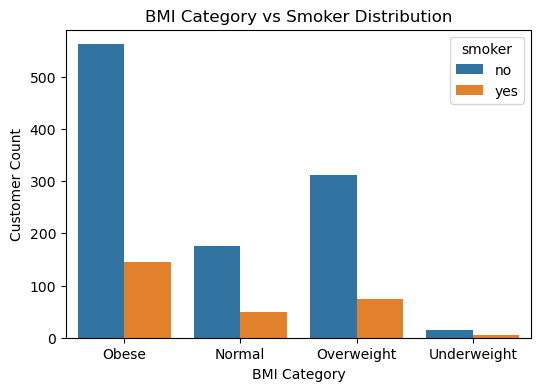

In [37]:
## Chart 16 : BMI Category vs Smoker (Count Plot)
plt.figure(figsize=(6,4))
sns.countplot(x = 'bmi_category' , hue = 'smoker' , data = df)
plt.title("BMI Category vs Smoker Distribution")
plt.xlabel("BMI Category")
plt.ylabel("Customer Count")
plt.show()

## Chart 16: BMI Category vs Smoker Distribution Analysis

### 1. Why did you pick this chart?

This count plot is used to analyze the relationship between BMI categories and smoking behavior. It helps identify combined health risk groups.

---

### 2. What insights are found from this chart?

• Obese category contains the highest number of smokers.  
• Overweight customers also show significant smoking presence.  
• Normal and underweight categories have fewer smokers.  
• High BMI and smoking often occur together.

---

### 3. Business Impact of these insights

• High-risk customers can be targeted with special health plans.  
• Combined risk-based premium strategies can be applied.  
• Wellness and smoking cessation programs can reduce claim costs.


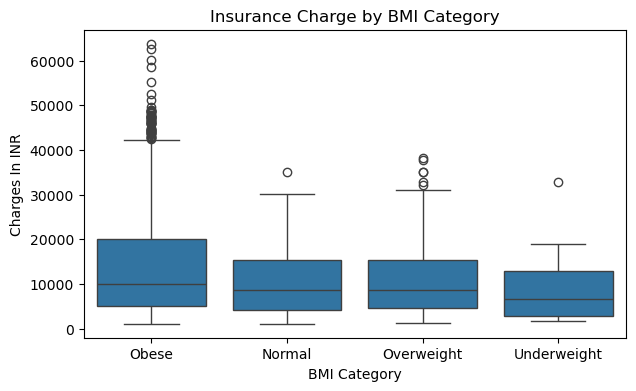

In [38]:
## Chart 17 : Insurance Charges by BMI Category (Box Plot)
plt.figure(figsize=(7,4))
sns.boxplot(x = 'bmi_category' , y = 'charges_in_inr' , data = df)
plt.title("Insurance Charge by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Charges In INR")
plt.show()

## Chart 17: Insurance Charges by BMI Category Analysis

### 1. Why did you pick this chart?

This box plot is used to analyze the variation and distribution of insurance charges across different BMI health categories. It helps identify high-risk groups and extreme claim values.

---

### 2. What insights are found from this chart?

• Obese customers have the highest median insurance charges.  
• Obese category shows many high-cost outliers.  
• Normal and underweight categories have lower and more stable insurance costs.  
• Insurance cost variability is higher in high BMI groups.

---

### 3. Business Impact of these insights

• High BMI customers can be classified as high-risk policy holders.  
• Premium pricing can be adjusted based on BMI category.  
• Preventive health programs can reduce extreme insurance claims.


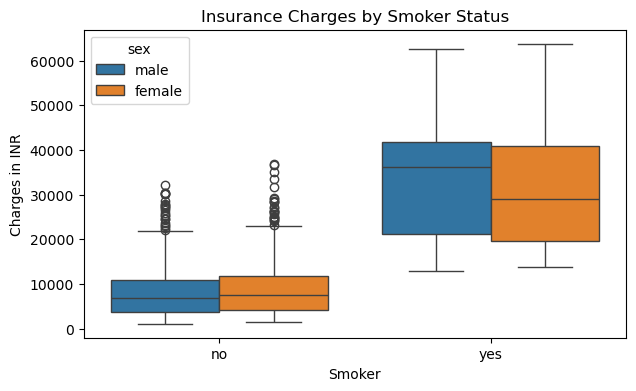

In [39]:
## Chart 18 : Insurance Charges by Smoker Status (Box Plot)

plt.figure(figsize=(7,4))
sns.boxplot(x='smoker', y='charges_in_inr', hue = 'sex', data=df)
plt.title("Insurance Charges by Smoker Status")
plt.xlabel("Smoker")
plt.ylabel("Charges in INR")
plt.show()

## Chart 18: Insurance Charges by Smoker Status (Box Plot with Gender Split) Analysis

### 1. Why did you pick this chart?

This box plot was chosen to analyze how smoking behavior and gender together affect insurance charges. It helps in comparing the distribution, median values, and variability of insurance costs for smokers and non-smokers across both male and female customers.

---

### 2. What insights are found from this chart?

   i . Smokers have significantly higher insurance charges compared to non-smokers for both genders.

   ii . The median insurance cost of smokers is nearly 3 to 4 times higher than that of non-smokers.

   iii . Male smokers show slightly higher median charges than female smokers.

   iv . Non-smokers (both male and female) have lower and more stable premium distributions with fewer extreme outliers.

   v .  Smokers show higher variability and more outliers, indicating higher medical risk and treatment costs.

---

### 3. Business Impact of These Insights

1 , Insurance companies can apply risk-based premium pricing by charging higher premiums for smokers.

2 , Special smoking cessation incentive programs can be introduced to reduce long-term claim costs.

3 , Gender-based analysis within smoker groups can help improve pricing fairness and segmentation strategies.

4 , These insights support better underwriting decisions and profitability optimization.


In [40]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,children,age,bmi,charges_in_inr
children,1.000000,0.042469,0.012759,0.067998
age,0.042469,1.000000,0.109272,0.299008
bmi,0.012759,0.109272,1.000000,0.198341
charges_in_inr,0.067998,0.299008,0.198341,1.000000


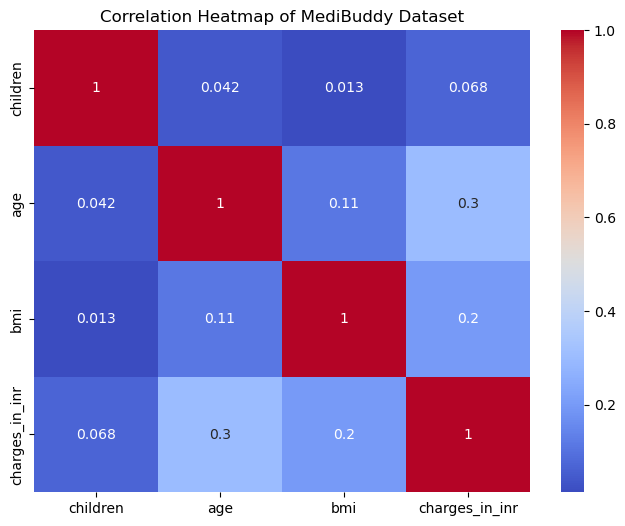

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of MediBuddy Dataset")
plt.show()

## Correlation Analysis Insights

• Age shows the highest positive correlation with insurance charges (0.30), indicating that older customers generally incur higher medical costs.

• BMI also has a positive relationship with insurance charges (0.20), suggesting that higher body mass index slightly increases insurance expenses.

• Number of children has a very weak correlation (0.07) with charges, indicating dependents do not significantly impact premium pricing.

• Overall, age and BMI are the most influential numerical factors affecting insurance cost in the MediBuddy dataset.


## Overall Insights

The MediBuddy insurance dataset analysis revealed several important patterns related to customer demographics and insurance charges. Age showed a moderate positive relationship with insurance charges, indicating that older customers generally tend to pay higher premiums. BMI also demonstrated a noticeable impact on insurance costs, with overweight and obese customers having higher average charges compared to customers with normal BMI.

Smoking status emerged as the strongest influencing factor on insurance pricing. Smokers consistently showed significantly higher insurance charges across all visualizations and box plots. This highlights smoking as a major health risk factor affecting premium calculation.

Regional analysis showed moderate variations in insurance charges across locations, suggesting that geographic factors may also influence healthcare expenses. Gender-based analysis indicated only small differences in insurance costs between male and female customers.

The number of dependents (children) showed a mild influence on insurance charges, with customers having moderate family sizes tending to incur slightly higher expenses.

Correlation analysis confirmed that age and BMI have positive correlations with insurance charges, while the number of children has a weak relationship with premium amounts.

Overall, lifestyle factors such as smoking and obesity were found to be more influential than demographic factors like gender and region.


## Conclusion

This Exploratory Data Analysis (EDA) project successfully analyzed the MediBuddy insurance dataset to identify key factors influencing insurance charges. The analysis showed that smoking status, BMI category, and age are the most significant contributors to higher insurance premiums.

Smokers and obese customers were found to have substantially higher medical costs, emphasizing the importance of preventive healthcare programs and lifestyle improvement initiatives. These findings can help insurance providers design better pricing strategies, risk assessment models, and customized insurance plans.

Regional differences in insurance charges were moderate, while gender differences showed minimal impact on pricing. The number of dependents showed only a weak relationship with insurance charges.

Overall, lifestyle-related factors such as smoking and obesity were found to be more influential than demographic factors. These insights can help MediBuddy optimize premium pricing strategies, design targeted insurance plans, improve risk assessment, and promote preventive healthcare programs.
